<a href="https://colab.research.google.com/github/victoriafabris/disciplina-dsp-audio-video/blob/main/atividade2/atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Processamento de Áudio com Python

Nesta atividade, você irá criar funções e verificar, de forma gráfica e auditiva, o efeito de alguns processamentos sobre sinais de áudio.

In [1]:
import numpy as np # para usar funções que lidam com vetores
import matplotlib.pyplot as plt # para desenhos
from scipy.io import wavfile
from IPython.display import (Audio, display, clear_output) # widget com os botões de play, volume e download
import math
import wave, sys

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

###A. 

Criar uma função para gerar um tom senoidal.

Parâmetros de entrada: frequência (Hz), duração (s), amplitude (0 a 1) e frequência de amostragem (Hz).

Verfique se a frequência da saída está correta medindo um período do sinal.
___

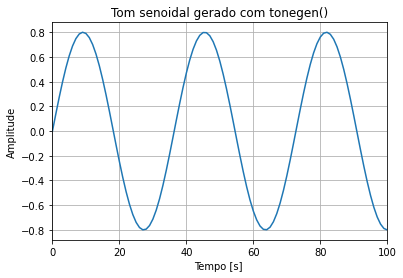

In [4]:
#funcao que gera um tom senoidal
def tonegen(freq:int, duration: float, fs: int, amplitude: float):
  #parametros do linspace (inicio, fim, numero de amostras)
  t = np.linspace(0., duration, int(fs * duration)) #variação do tempo
  #criando o sinal senoidal com sin()
  x = amplitude*np.sin(freq * np.pi * t)
  return x

#funcao que toca o tom senoidal
def play(tom, fs: int):
  #criando o widget de audio com display()
  display(Audio(data = tom, rate=fs))
  
s440 = tonegen(freq = 440, duration = 2, fs = 8000, amplitude = 0.8)
play(tom = s440, fs = 8000)
plt.title("Tom senoidal gerado com tonegen()")
plt.xlabel("Tempo [s] ")
plt.ylabel("Amplitude")
plt.xlim(0,100)
plt.grid()
plt.plot(s440)
plt.show()

###B. 
Criar uma função que receba um vetor com uma sequência de dígitos e gere tons DTMF correspondentes. Os parâmetros de entrada da função são: sequência de dígitos, duração em segundos de cada dígito, intervalo em segundos entre cada dígito e amplitude (0 a 1). O sinal de saída deve ter frequência de amostragem de 8 kHz.

Para verificar se o sinal está correto, teste a saída usando um decodificador DTMF, como os listados:
- online: DialABC http://dialabc.com/sound/
- Android DTMF Transceiver https://play.google.com/store/
- Android DTMF Decoder https://play.google.com/store/
- OcenAudio, em Análise/Detectar tons DTMF
___

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:135: RuntimeWarning: invalid value encountered in true_divide
  scaled = np.int16(data/np.max(np.abs(data))*32767).tolist()


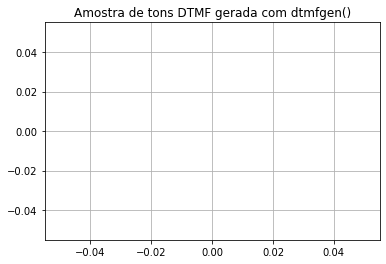

In [6]:
DTMF_TABLE = {
    '1': {'dtmf1': 697, 'dtmf2': 1209},
    '2': {'dtmf1': 697, 'dtmf2': 1336},
    '3': {'dtmf1': 693, 'dtmf2': 1477},
    'A': {'dtmf1': 697, 'dtmf2': 1633},

    '4': {'dtmf1': 770, 'dtmf2': 1209},
    '5': {'dtmf1': 770, 'dtmf2': 1336},
    '6': {'dtmf1': 770, 'dtmf2': 1477},
    'B': {'dtmf1': 770, 'dtmf2': 1633},
          
    '7': {'dtmf1': 852, 'dtmf2': 1209},
    '8': {'dtmf1': 852, 'dtmf2': 1336},
    '9': {'dtmf1': 852, 'dtmf2': 1477},
    'C': {'dtmf1': 852, 'dtmf2': 1633},

    '*': {'dtmf1': 941, 'dtmf2': 1209},
    '0': {'dtmf1': 941, 'dtmf2': 1336},
    '#': {'dtmf1': 941, 'dtmf2': 1477},
    'D': {'dtmf1': 941, 'dtmf2': 1633},
}

def dtmfgen(sequency: np.array, duration: np.float, delay: np.float, amplitude: np.float):
    Fs = 8000 #Sample frequency used to generate the signal in Hz

    #parametros: (inicio, final, step)
    time_tone = np.arange(0, duration, (1 / Fs))
    time_delay = np.arange(0, delay, (1 / Fs))
    
    x = [0]
    #varrer vetor sequency e armazenar valores de dtmf1 e dtmf2
    for x in range (len(sequency)):
      fr_1 = DTMF_TABLE[sequency[x]]['dtmf1'] #primeira freq do char
      fr_2 = DTMF_TABLE[sequency[x]]['dtmf2'] #segunda freq do char
      #criando os dois tons dtmf
      tone_samples = tonegen(fr_1, duration, amplitude/2, Fs) + tonegen(fr_2, duration, amplitude/2, Fs)
      #colocando o delay nos tons
      delay_samples = np.sin(2 * np.pi * 0 * delay)
      #criando a sample com tom e delay
      sample = np.append(tone_samples, delay_samples)
    
    return sample

s981 = dtmfgen(sequency = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], duration = 0.2, delay = 40e-3, amplitude = 0.7)
play(s981, 8000)
plt.title("Amostra de tons DTMF gerada com dtmfgen()")
plt.grid()
plt.plot(s981)
plt.show()

###C.

Criar uma função para remover uma em cada duas amostras de um sinal, criando um novo sinal que tem somente as amostras de índice ímpar do sinal original.
___

In [ ]:
#funcao que remove elementos de índice par de uma lista
def halfsp(sample):
  half_sample = sample[::2] #slice
  return half_sample

x = np.array([7, 3, 9, 1, 0, 4]) #sinal amostrado
half_sample = halfsp(x)
print(half_sample)
#resultado esperado: [7 9 0]

[7 9 0]


###D.

Criar uma função para criar um novo sinal que insere uma nova amostra entre cada duas amostras. Essa nova amostra é a média das duas amostras vizinhas.
___

In [ ]:
#funcao que insere uma nova sample a cada duas num array, nova sample é media das duas vizinhas
def doublesp(sample):
  #criando um array
  ds = np.array([])
  for i in range(0,sample.size-1):
    mean = (sample[i]+sample[i+1])/2
    ds = np.append(ds,[sample[i],mean])
  ds = np.append(ds,sample[i+1]) 
  return ds

x=np.array([7, 3, 9, 1, 0, 4])
double_sample=doublesp(x)
print(double_sample.astype(int))
#resultado esperado: [7 5 3 6 9 5 1 0.5 0 2 4]


[7 5 3 6 9 5 1 0 0 2 4]


###E.

Gere um tom de 220 Hz. Aplique a função `halfsp`. Escute o resultado antes e depois da aplicação. O que ocorre na frequência e no tempo? Mostre graficamente o resultado na frequência através da transformada de Fourier (implementada pela função `numpy.fft`).
___

Entre o tom original de 220Hz e o tom gerado com `halfsp()`, temos a diferença no eixo x, onde nota-se uma diminuição no período da onda (tempo que leva para completar um ciclo de repetição) O tom alterado ficou com metade do período do tom original. Consequentemente, vemos também um aumento na frequência do tom novo (já que T=1/f).

Podemos observar isto melhor no terceiro gráfico de comparativo entre os tons.

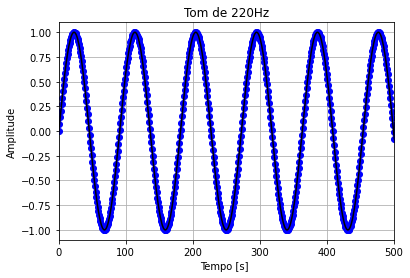

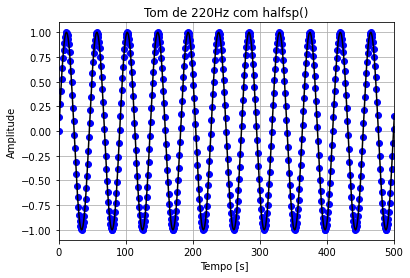

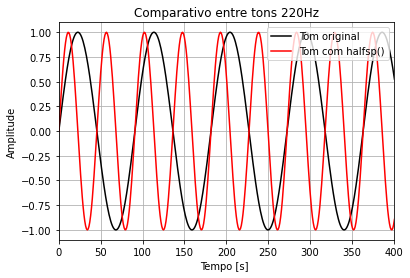

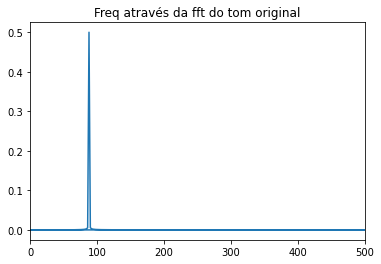

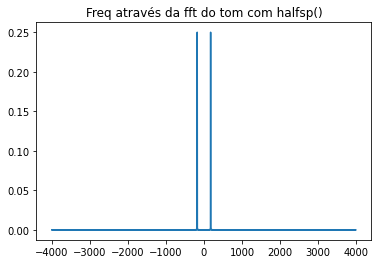

In [ ]:
s220 = tonegen(220, 0.5, 0.8, 8000)  #gerando o tom de 220Hz
#plotando
plt.plot(s220,'bo', s220, 'k')
plt.grid()
plt.title('Tom de 220Hz')
plt.xlabel("Tempo [s] ")
plt.ylabel("Amplitude")
plt.xlim(0,500)
plt.show()
play(s220, fs = 8000)

half_sample_s220 = halfsp(s220) #removendo indices pares da lista
plt.plot(half_sample_s220,'bo', half_sample_s220, 'k')
plt.grid()
plt.title('Tom de 220Hz com halfsp()')
plt.xlabel("Tempo [s] ")
plt.ylabel("Amplitude")
plt.xlim(0,500)
plt.show()
play(half_sample_s220, fs = 8000)

plt.xlim(0,400)
plt.plot(s220,'k', half_sample_s220, 'r')
plt.grid()
plt.legend(('Tom original', 'Tom com halfsp()'),
           loc='upper right')
plt.title('Comparativo entre tons 220Hz')
plt.xlabel("Tempo [s] ")
plt.ylabel("Amplitude")
plt.show()

#vendo a fft dos tons
#np.fft.ftt: Compute the one-dimensional discrete Fourier Transform with the efficient Fast Fourier Transform (FFT) algorithm

s220_fft=np.fft.fft(s220) #fft de s220
ns=s220_fft.size
fs_220=np.fft.fftfreq(ns,1/8000) #Return the Discrete Fourier Transform sample frequencies.

half_sample_s220_fft=np.fft.fft(half_sample_s220) #fft de s220 half sample
nh=half_sample_s220_fft.size
fs_half_sample_220=np.fft.fftfreq(nh,1/8000) #Return the Discrete Fourier Transform sample frequencies.

plt.xlim(0,500)
#plot(frequencia, fft)
plt.plot(fs_220,abs(s220_fft)/4000)
plt.title('Freq através da fft do tom original')
plt.show()

plt.xlim(0,500)
plt.plot(fs_half_sample_220,abs(half_sample_s220_fft)/4000)
plt.title('Freq através da fft do tom com halfsp()')
plt.show()


###F.
Faça a mesma análise no tempo e frequência em relação à função `doublesp`.
___

Já para esta situação, onde são duplicadas as amostras de um sinal com a função `doublsp()`, temos um aumento no período de tempo no tom com amostras duplicadas (o período foi duplicado em relação ao tom original) Consequentemente a frequência diminuiu.

Podemos observar isto melhor no terceiro gráfico de comparativo entre os tons.

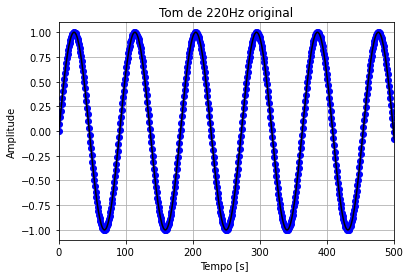

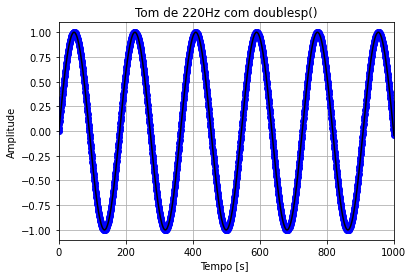

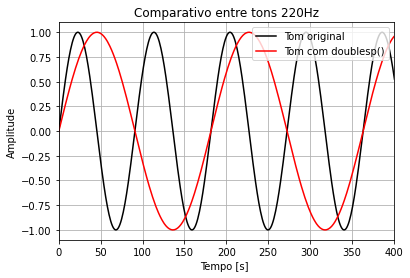

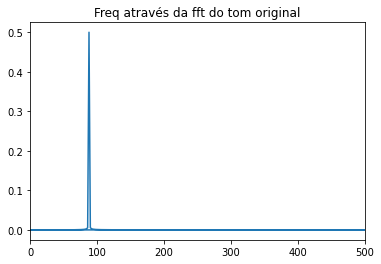

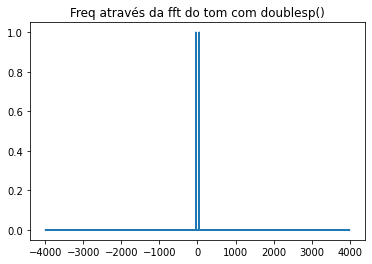

In [ ]:
s220 = tonegen(220, 0.5, 0.8, 8000)  #gerando o tom
plt.plot(s220,'bo', s220, 'k')
plt.grid()
plt.title('Tom de 220Hz original')
plt.xlabel("Tempo [s] ")
plt.ylabel("Amplitude")
plt.xlim(0,500)
plt.show()
play(s220, fs = 8000)

double_sample_s220 = doublesp(s220) #removendo indices par da lista
plt.plot(double_sample_s220,'bo', double_sample_s220, 'k')
plt.grid()
plt.title('Tom de 220Hz com doublesp()')
plt.xlabel("Tempo [s] ")
plt.ylabel("Amplitude")
plt.xlim(0,1000)
plt.show()
play(double_sample_s220, fs = 8000)

plt.xlim(0,400)
plt.plot(s220,'k', double_sample_s220, 'r')
plt.grid()
plt.legend(('Tom original', 'Tom com doublesp()'),
           loc='upper right')
plt.title('Comparativo entre tons 220Hz')
plt.xlabel("Tempo [s] ")
plt.ylabel("Amplitude")
plt.show()

#vendo a fft dos tons
#np.fft.ftt: Compute the one-dimensional discrete Fourier Transform with the efficient Fast Fourier Transform (FFT) algorithm

s220_fft=np.fft.fft(s220) #fft de s220
ns=s220_fft.size
fs_220=np.fft.fftfreq(ns,1/8000) #Return the Discrete Fourier Transform sample frequencies.

double_sample_s220_fft=np.fft.fft(double_sample_s220) #fft de s220 half sample
nh=double_sample_s220_fft.size
fs_double_sample_s220=np.fft.fftfreq(nh,1/8000) #Return the Discrete Fourier Transform sample frequencies.

plt.xlim(0,500)
#plot(frequencia, fft)
plt.plot(fs_220,abs(s220_fft)/4000)
plt.title('Freq através da fft do tom original')
plt.show()

plt.xlim(0,500)
plt.plot(fs_double_sample_s220,abs(double_sample_s220_fft)/4000)
plt.title('Freq através da fft do tom com doublesp()')
plt.show()

###G. 
Grave alguma frase com sua voz. Depois, observe e escute o resultado do processamento com:
- `halfsp`
- `doublesp`
- `numpy.fliplr` (gravar em stereo)
- `numpy.flipud` (gravar em mono)

Apresente os resultados e comente qual o efeito de cada processamento.
___
para o fliplr: vetor deve ter mais que duas dimensões,
para o flipud: vetor deve ter tamanho mais que 1

In [ ]:
#este arquivo precisa estar no notebook
arquivo = "/content/atividade1_audios_audio_apresentacao.wav"
arquivo_mono = "/content/atividade1_audios_audio_apresentacao_mono.wav"

In [ ]:
Fs, data = wavfile.read(arquivo)
duration = len(data)/Fs
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/Fs)

Fs_mono, data_mono = wavfile.read(arquivo_mono)

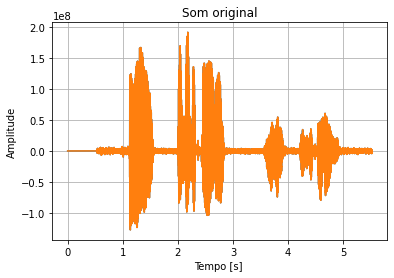

In [ ]:
def visualize(sample, time):
  plt.title("Som original")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.grid()
  plt.plot(time, data)
  plt.show()
visualize(data, time)

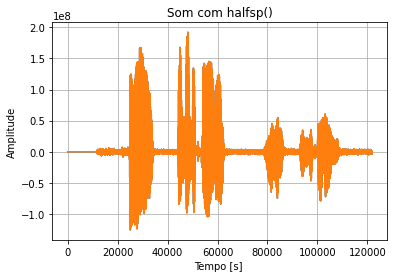

error: ignored

In [ ]:
result_half=halfsp(sample = data)

duration = len(data)/Fs
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/Fs)

def visualize(sample, time):
  plt.title("Som com halfsp()")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.grid()
  plt.plot(result_half)
  plt.show()

visualize(result_half, time)
play(result_half, fs = Fs)

In [ ]:
result_double=doublesp(sample = data)

duration = len(data)/Fs
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/Fs)

def visualize(sample, time):
  plt.title("Som com doublesp()")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.grid()
  plt.plot(result_double)
  plt.show()

visualize(result_double, time)

IndexError: ignored

In [ ]:
play(result_double, fs = Fs)

(243712, 2)


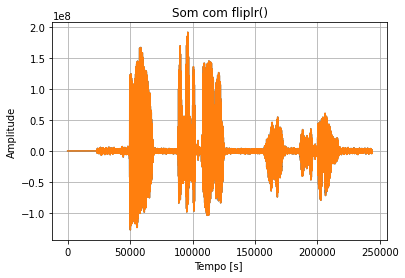

error: ignored

In [ ]:
print(data.shape)
result_flip=np.fliplr(data)

duration = len(data)/Fs
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/Fs)

def visualize(sample, time):
  plt.title("Som com fliplr()")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.grid()
  plt.plot(result_flip)
  plt.show()
visualize(result_flip, time)
play(result_flip, fs = Fs)

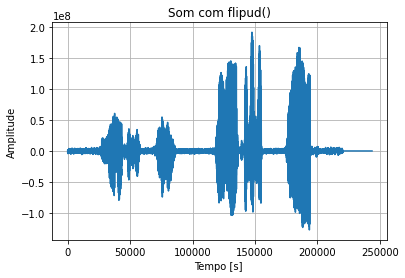

In [ ]:
result_ud=np.flipud(data_mono)

duration = len(data_mono)/Fs
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/Fs_mono)

def visualize(sample, time):
  plt.title("Som com flipud()")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.grid()
  plt.plot(result_ud)
  plt.show()

visualize(result_ud, time)
play(result_ud, fs = Fs)

###H. 
Crie uma função que gere um modelo discreto de um sinal de eco $s_e(t)=\alpha s(t-T)$, onde $\alpha$ é o fator de atenuação, $T$, o atraso (em segundos) e $s(t)$, o sinal original. Assuma que $0 \leq \alpha \leq 1$ e que $T \geq 0$. O sinal resultante, com eco, é $r(t)=s(t)+s_e(t)$.

Gere sinais com eco a partir de uma gravação de voz (teste antes com um ou dois impulsos para verificar seu código). Experimente com diferentes valores de atenuação e atraso (teste, por exemplo, com fator de atenuação de 0,65 e atraso de 250 ms). Qual o impacto sobre o sinal sintetizado?
___

Notamos pelos resultados abaixo da aplicação da função eco criada que ela altera o sinal sintetizado, fazendo ele se "arrastar". Observamos que ele acaba ocupando um maior tempo.

In [ ]:
def echo(signal, attenuation: float, delay: float, Fs: int):
  ###delay do sinal
  delayer = np.zeros(math.ceil (delay * Fs))
  ###fator de atenuacao do sinal
  #The attenuation factor is the ratio of the amplitude of the reflected sound to the original sound
  attSig = attenuation*signal
  #adicionando a atenuacao ao delay
  delSin = np.append(delayer,attSig)
  #adicionando o delay ao sinal
  sig = np.append(signal,delayer)
  return sig+delSin

Observamos abaixo que aplicando a função echo em um impulso, é clara a atuação do eco, fazendo o sinal antes unitário no ponto 0, se deslocar para os pontos vizinhos.

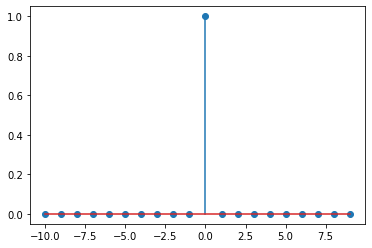

<StemContainer object of 3 artists>

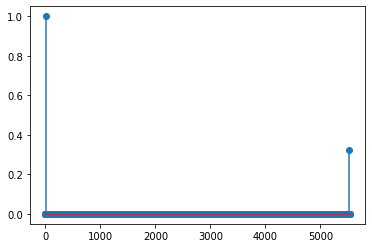

In [ ]:
n = np.arange(-10, 10, 1)
impulso = (n==0)*1
plt.stem(n, impulso)
plt.show()
eco = echo(signal = impulso, attenuation = .325, delay = .125, Fs = Fs)
plt.stem(eco)

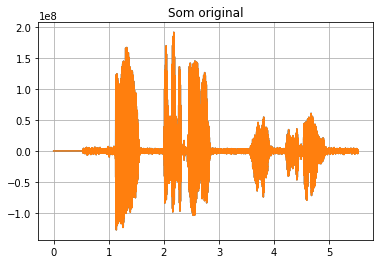

In [ ]:
Fs, data = wavfile.read(arquivo)
duration = len(data)/Fs
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/Fs)

plt.title("Som original")
plt.grid()
plt.plot(time, data)
plt.show()

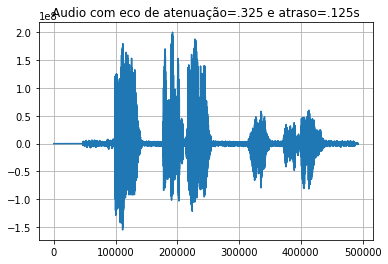

In [ ]:
echo1 = echo(signal = data, attenuation = .325, delay = .125, Fs = Fs)
plt.plot(echo1)
plt.title('Audio com eco de atenuação=.325 e atraso=.125s')
plt.grid()
plt.show()

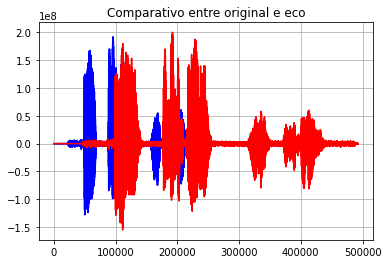

In [ ]:
plt.plot(data,'b', echo1, 'r')
plt.grid()
plt.title('Comparativo entre original e eco')
plt.show()

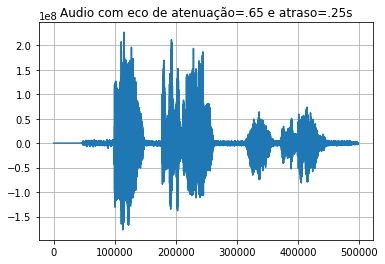

In [ ]:
echo2 = echo(signal = data, attenuation = .65, delay = .25, Fs = Fs)
plt.plot(echo2)
plt.title('Audio com eco de atenuação=.65 e atraso=.25s')
plt.grid()
plt.show()

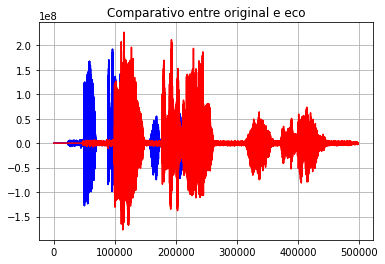

In [ ]:
plt.plot(data,'b', echo2, 'r')
plt.grid()
plt.title('Comparativo entre original e eco')
plt.show()

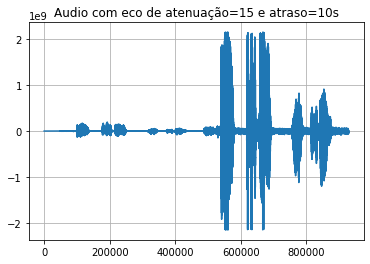

In [ ]:
echo3 = echo(signal = data, attenuation = 15, delay = 10, Fs = Fs)
plt.plot(echo3)
plt.title('Audio com eco de atenuação=15 e atraso=10s')
plt.grid()
plt.show()

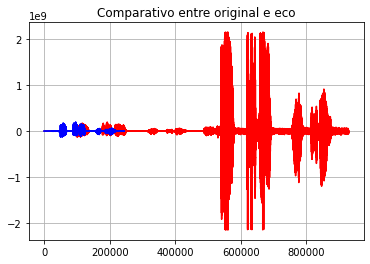

In [ ]:
plt.plot(echo3,'r', data, 'b')
plt.grid()
plt.title('Comparativo entre original e eco')
plt.show()

###I. 
Acesse o banco de respostas ao impulso de ambientes em http://www.openairlib.net, link IR Data. Observe que as respostas são longas, geralmente maiores que 2 segundos.

Escolha uma resposta, baixe o arquivo e faça a operação de convolução do trecho de voz que você gravou com essa resposta de ambiente (certifique-se que as frequências de amostragem são as mesmas) usando `numpy.convolve`. Se as frequências de amostragem forem diferentes, você pode reamostrar um dos arquivos (áudio ou resposta) no Ocenaudio.

(opcional)Meça o tempo de processamento para vários tamanhos de resposta, usando uma das formas descritas em https://cmdlinetips.com/2018/01/two-ways-to-compute-executing-time-in-python/. Faça um gráfico do tempo de processamento em função do tamanho da resposta (entre 100 ms e 3 s, com pelo menos 5 pontos; para fazer isso, você irá cortar a resposta). Comente.
___

Resposta ao impulso escolhida: Central Hall, University of York

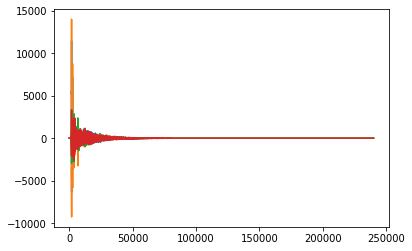

Audio: 


Frequências de amostragem não são a mesma!
Fs da áudio: 44100, Fs do eco: 96000


In [ ]:
arquivo = "/content/atividade1_audios_audio_apresentacao_mono.wav"
Fs, data = wavfile.read(arquivo)
duration = len(data)/Fs
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/Fs)
eco_hall_arquivo= "/content/ir_centre_stalls.wav"
Fs_eco, eco_hall = wavfile.read(eco_hall_arquivo)
plt.plot(eco_hall)
#plt.xlim(10000)
plt.show()

print("Audio: ")
play(data, Fs)

if not Fs == Fs_eco:
  print("Frequências de amostragem não são a mesma!")
  print(f"Fs da áudio: {Fs}, Fs do eco: {Fs_eco}")

Como as freqs. de amostragem não são a mesma, iremos reamostrar o eco para possuir a mesma Fs que o áudio. Também foi alterado para mono.

In [ ]:
eco_hall_ream_arquivo = "/content/eco_hall_reamostrado_mono.wav"
Fs_eco_ream, eco_hall_reamostrado = wavfile.read(eco_hall_ream_arquivo)
duration = len(eco_hall_reamostrado)/Fs
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/Fs)
print("Eco de Central Hall, University of York: ")
play(eco_hall_reamostrado, Fs)

if not Fs == Fs_eco_ream:
  print("Frequências de amostragem não são a mesma!")
  print(f"Fs da áudio: {Fs}, Fs do eco: {Fs_eco}")

Eco de Central Hall, University of York: 


In [ ]:
print(f"Shape do áudio: {data.shape}, Shape do eco: {eco_hall_reamostrado.shape}")

Shape do áudio: (243712,), Shape do eco: (110234,)


In [ ]:
convolucao = np.convolve(data, eco_hall_reamostrado/1e8)

In [ ]:
audio = convolucao*(2**15-1)/np.max(np.abs(convolucao))
audio = audio.astype(np.int16)

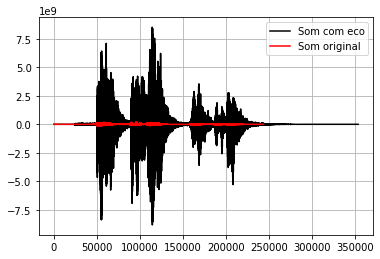

In [ ]:
play(audio, fs= Fs)

plt.plot(convolucao,'k', data, 'r')
plt.grid()
plt.legend(('Som com eco', 'Som original'),
           loc='upper right')
plt.show()

obs: verificar se play funciona com audios estereo